In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../investments.csv')
df = df.loc[:, ['company_category_list', 'funded_at', 'raised_amount_usd']]
df.dropna(inplace=True)
df['funded_at'] = pd.to_datetime(df['funded_at'])
df['Year'] = df['funded_at'].dt.year

In [33]:
sectors = ['Biotechnology', 'Machine Learning', 'Cloud Computing', 'Apps', 'FinTech', 'Android']
nRows = 2
nCols = 3

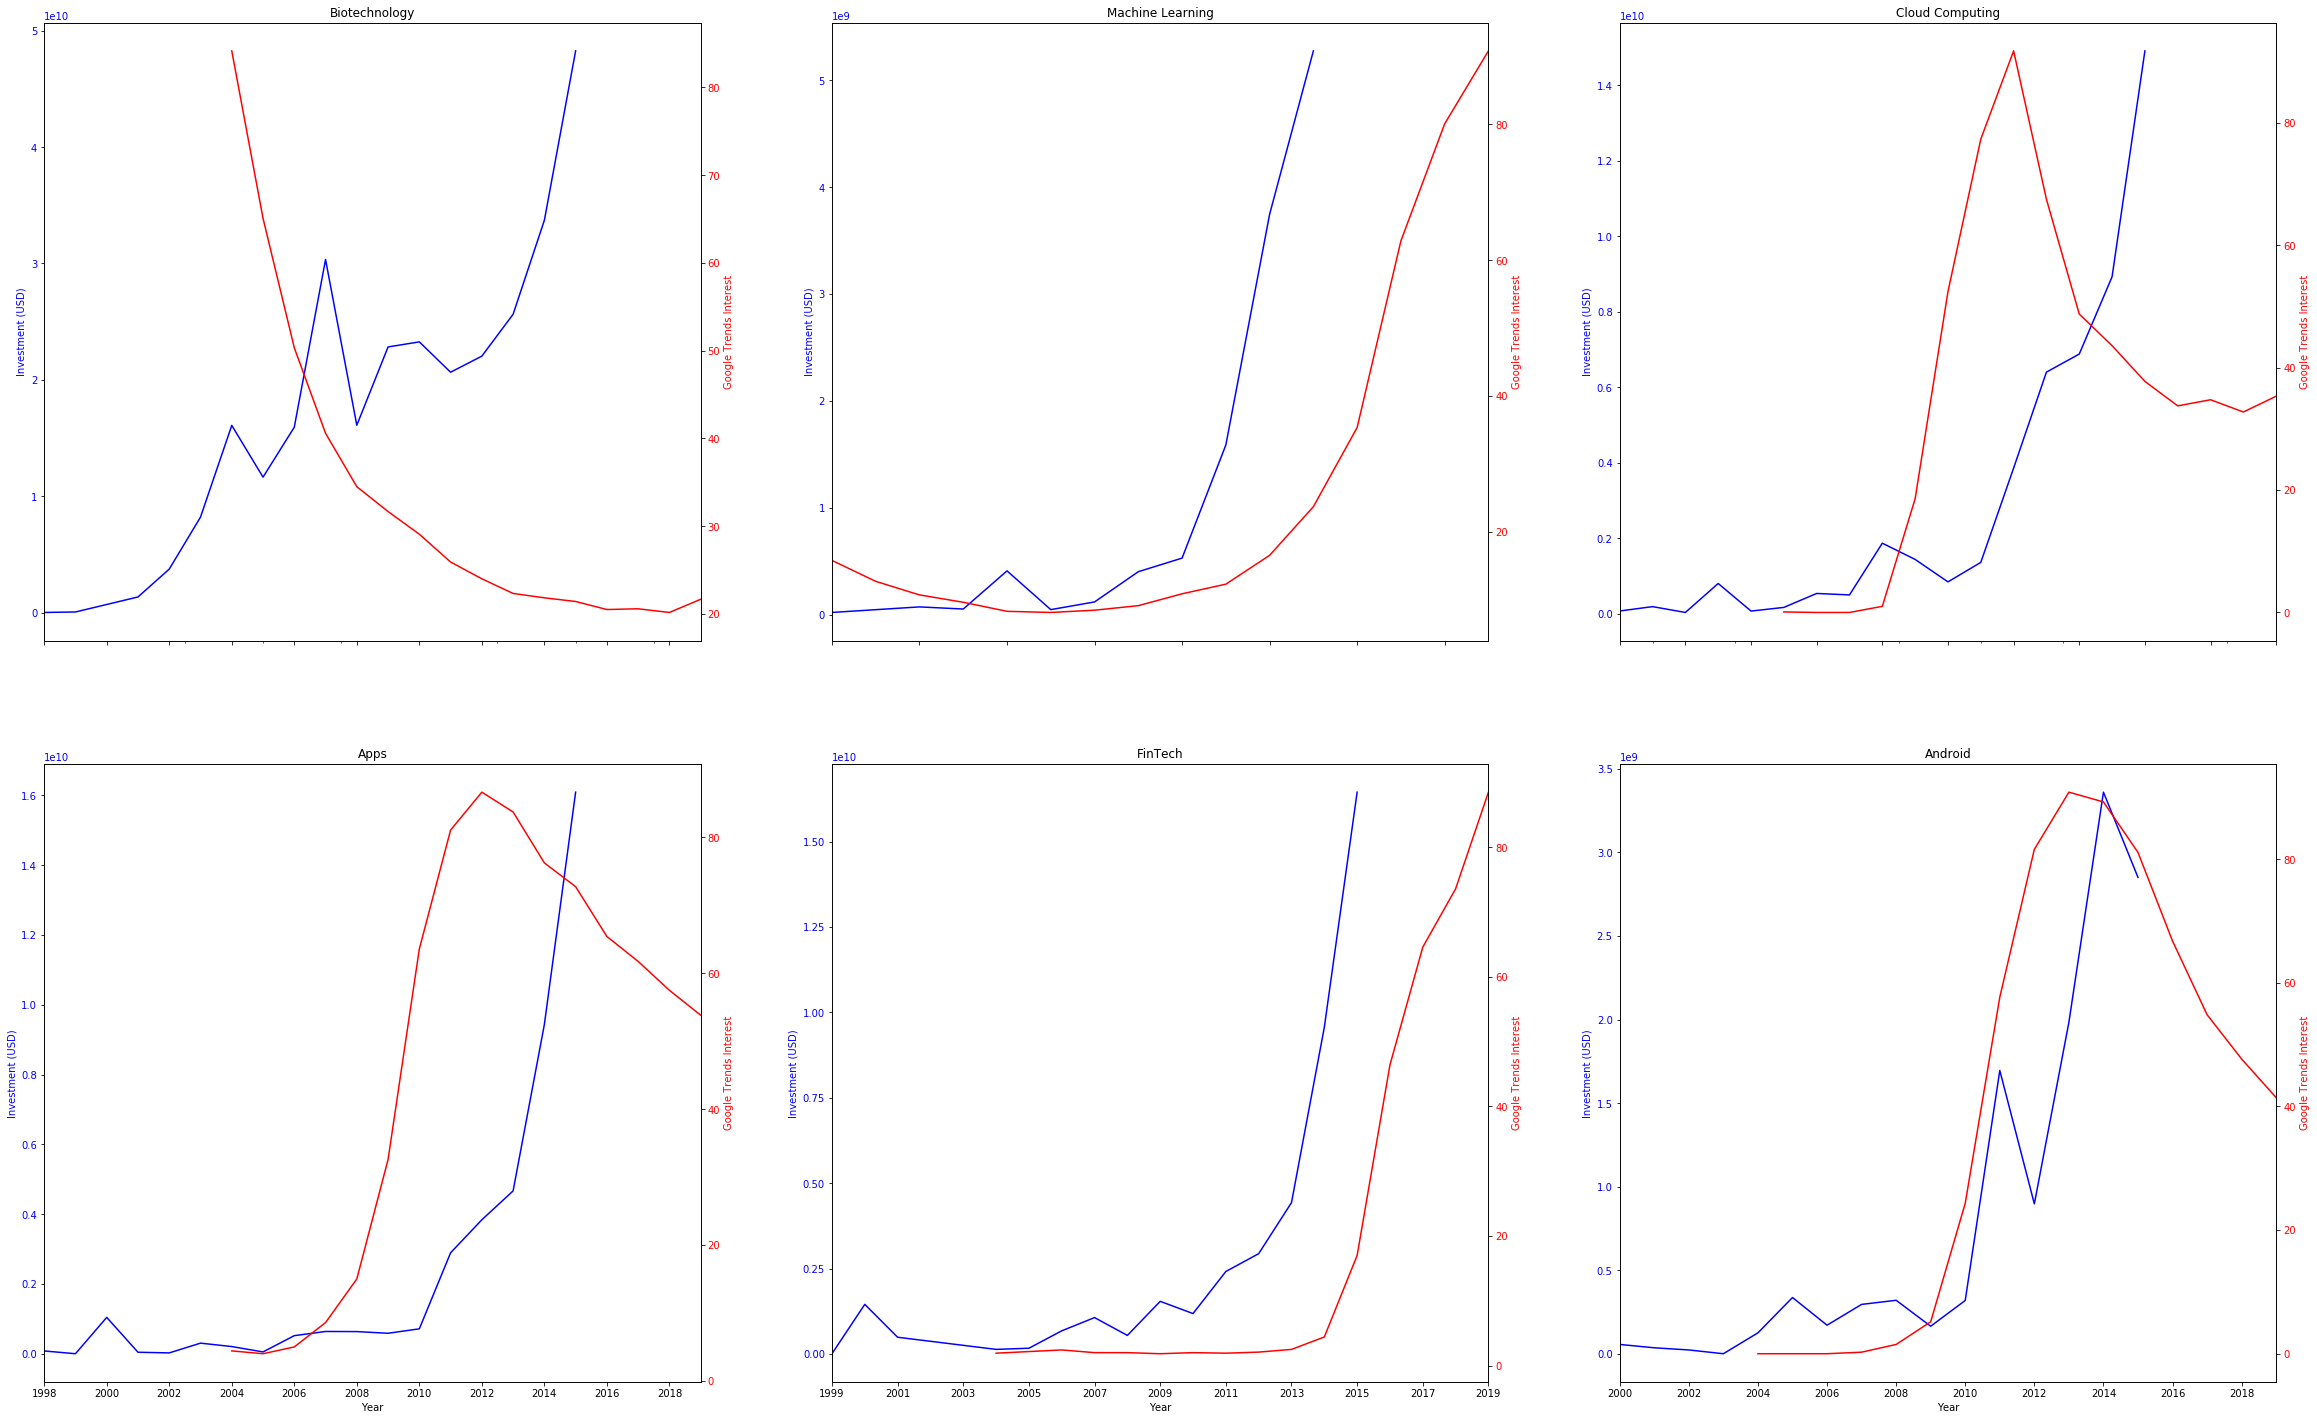

In [34]:
fig, axes = plt.subplots(nRows, nCols, squeeze=False, figsize=(15*nCols-5, 15*nRows-5))

for i, sector in enumerate(sectors):
    row = i // nCols
    col = i % nCols
    
    sector_df = df[df['company_category_list'].str.contains(sector)]
    
    sector_years = sector_df.groupby('Year')['raised_amount_usd'].sum()
    
    google_df = pd.read_csv(sector + '.csv', skiprows=2)
    google_df['Month'] = pd.to_datetime(google_df['Month'])
    google_df['Year'] = google_df['Month'].dt.year
    
    google_df[sector + ': (Worldwide)'].replace('<1', '0', inplace=True)
    google_df[sector + ': (Worldwide)'] = google_df[sector + ': (Worldwide)'].astype(int)
    
    google_years = google_df.groupby('Year')[sector + ': (Worldwide)'].mean()
    
    ax1 = axes[row][col]
    sector_years.plot(ax=ax1, color='blue')
    ax2 = ax1.twinx()
    google_years.plot(ax=ax2, color='red')
    
    min_year = sector_df['Year'].sort_values().iat[0]
    
    _ = ax1.set_xlim([min_year, 2019])
    _ = ax1.set_xticks([x for x in range(min_year,2020,2)])
    _ = ax1.set_ylabel('Investment (USD)', color='blue')
    _ = ax2.set_ylabel('Google Trends Interest', color='red')
    _ = ax1.tick_params(axis='y', labelcolor='blue')
    _ = ax2.tick_params(axis='y', labelcolor='red')
    _ = ax1.set_title(sector)

In [35]:
fig.savefig('trends.jpg')